Rami, Nicola Srour (2025)

Title: USA e-commerce records dataset, Logistic regrerssion

In [ ]:
# import required libraries
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

In [ ]:
# upload dataset
df = pd.read_csv("US  E-commerce records 2020.csv", encoding = 'latin-1')
df.head(3)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280


In [ ]:
# remove uneeded it columns
df = df.drop(['Order ID' , 'Customer ID', 'Row ID', 'Postal Code', 'Product ID', 'Product Name'], axis=1)
# remove duplicates
df = df.drop_duplicates()
# remove null values
df = df.dropna()
df.head(2)

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,01-01-20,Standard Class,Consumer,United States,Lorain,Ohio,East,Furniture,Furnishings,48.896,4,0.2,8.5568
1,01-01-20,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,474.430,11,0.0,199.2606


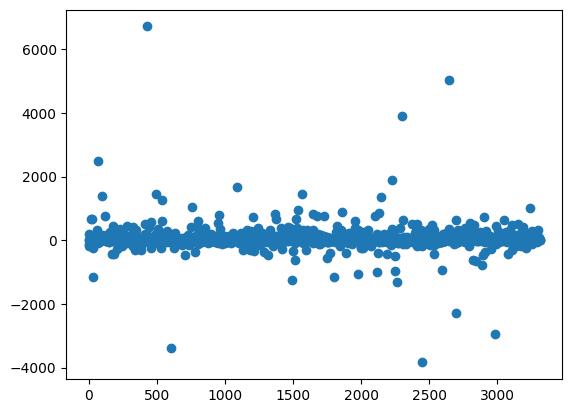

In [ ]:
# use scatter plot to remove outliers
import matplotlib.pyplot as plt

plt.scatter(df.index, df['Profit'])
plt.show()

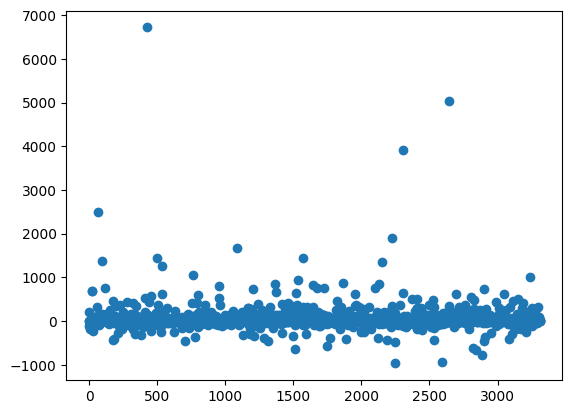

In [ ]:
df = df[df['Profit'] > -1000]
df = df[df['Profit'] > -1000]
plt.scatter(df.index, df['Profit'])
plt.show()

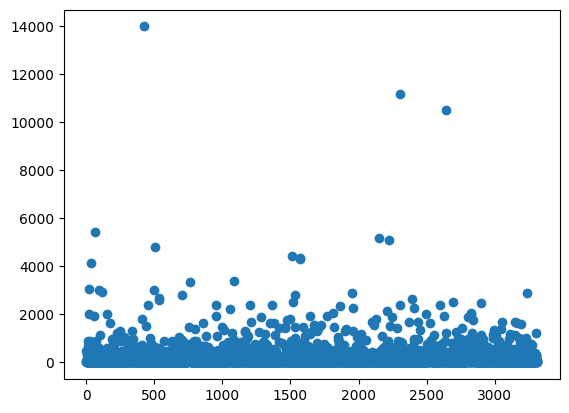

In [ ]:
plt.scatter(df.index, df['Sales'])
plt.show()

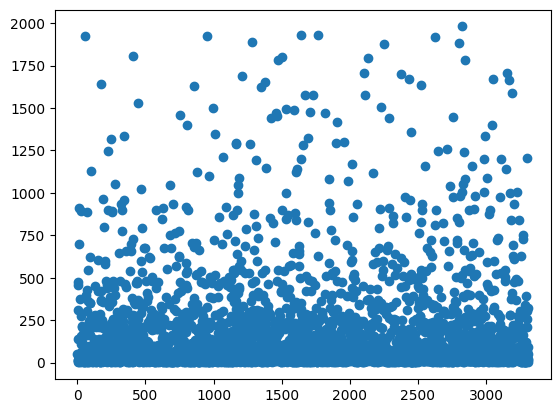

In [ ]:
df = df[df['Sales'] < 2000]
plt.scatter(df.index, df['Sales'])
plt.show()

In [ ]:
# changed date column values to date data
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-8-05d252d28848>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
# counting unique values in each column with cateogrical values to know which encoding method to use
uniqueseg = df['Segment'].nunique()
uniqueCountry = df['Country'].nunique()
uniqucity = df['City'].nunique()
uniquestate = df['State'].nunique()
uniquCategory = df['Category'].nunique()
uniqueSubCategory = df['Sub-Category'].nunique()
print(uniqueseg, uniqueCountry, uniqucity, uniquestate, uniquCategory, uniqueSubCategory)

3 1 350 47 3 17


In [ ]:
# use lable encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Segment'] = df['Segment'].replace({'Consumer' : 1, 'Home Office' : 2, 'Corporate': 3})
df['Country'] = df['Country'].replace({'United States' : 1})
df['Category'] = df['Category'].replace({'Furniture' : 1, 'Office Supplies' : 2, 'Technology': 3})
df['City'] = encoder.fit_transform(df['City'])
df['Sub-Category'] = encoder.fit_transform(df['Sub-Category'])
df['State'] = encoder.fit_transform(df['State'])
df['Ship Mode'] = encoder.fit_transform(df['Ship Mode'])
df['Region'] = encoder.fit_transform(df['Region'])
df['Order Date'] = encoder.fit_transform(df['Order Date'])
df.head(2)

<ipython-input-10-b2f5950e59d1>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Segment'] = df['Segment'].replace({'Consumer' : 1, 'Home Office' : 2, 'Corporate': 3})
<ipython-input-10-b2f5950e59d1>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({'United States' : 1})
<ipython-input-10-b2f5950e59d1>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,3,1,1,173,32,1,1,9,48.896,4,0.2,8.5568
1,0,3,1,1,174,3,3,1,9,474.430,11,0.0,199.2606


In [ ]:
# split the dataset, build, train and test the machine learning models
x = df.drop(['Category'], axis=1)
y = df['Category']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (3259, 13)
x_train: (2444, 12)
y_train: (2444,)
x_test: (815, 12)
y_test: (815,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
acc = sklearn.metrics.accuracy_score(y_test,y_predicted)
acc

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6331288343558282

AmmarAhmad, (2021), United States E-Commerce records 2020, Kaggle, Available at: https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020, (Accessed : 04/04/2025 )